Titanic 資料探索報告
====================

**作者：** 謝閔弘  
**日期：** 2025-08-07  

---

**專案背景：**  
- 5 天快速突擊 EDA  
- 使用 JupyterLab + pandas + seaborn  

---

目標
----
1. 載入並檢視 Titanic 資料  
2. 探索缺值與異常  
3. 視覺化主要特徵對生還率的影響  
4. 清洗並做初步特徵工程  
5. 產出可重現的報告

In [1]:
## Day 1：資料載入與初探  

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Seaborn 風格
sns.set_style("whitegrid")


# 主要字型族群用 sans-serif
plt.rcParams['font.family']        = 'sans-serif'
# 告訴 sans-serif 裡面要把正黑體放第一
plt.rcParams['font.sans-serif']   = ['Microsoft JhengHei']
# 讓負號正常顯示
plt.rcParams['axes.unicode_minus'] = False

# 讀取 CSV
df = pd.read_csv("../data/titanic.csv")

display(df.head())
print("✅ 載入成功，共有筆數：", len(df))

# 檢查欄位數量與型態
df.info()

# 看簡單統計摘要
df.describe()

# 看每個欄位的缺失值數量
df.isna().sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


✅ 載入成功，共有筆數： 891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

📉 缺值比例 (%):


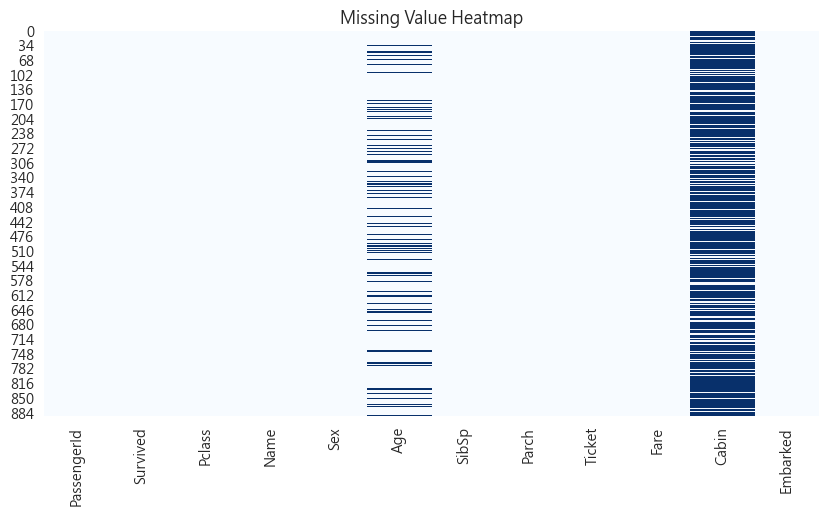

🎯 年齡極端值檢查：
最小年齡： 0.42
最大年齡： 80.0


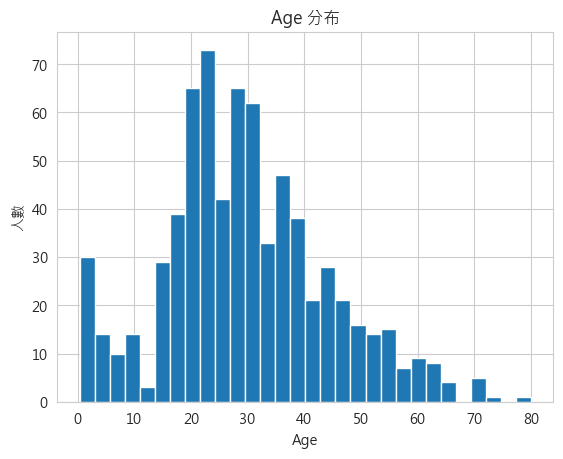

In [2]:
## Day 2：資料概覽與缺值分析  

print("📉 缺值比例 (%):")
(df.isna().mean() * 100).round(2)

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="Blues")
plt.title("Missing Value Heatmap")
plt.show()

print("🎯 年齡極端值檢查：")
print("最小年齡：", df["Age"].min())
print("最大年齡：", df["Age"].max())

df["Age"].hist(bins=30)
plt.title("Age 分布")
plt.xlabel("Age")
plt.ylabel("人數")
plt.show()


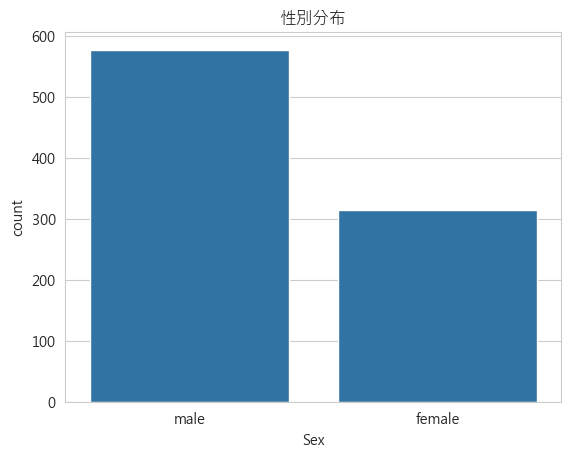

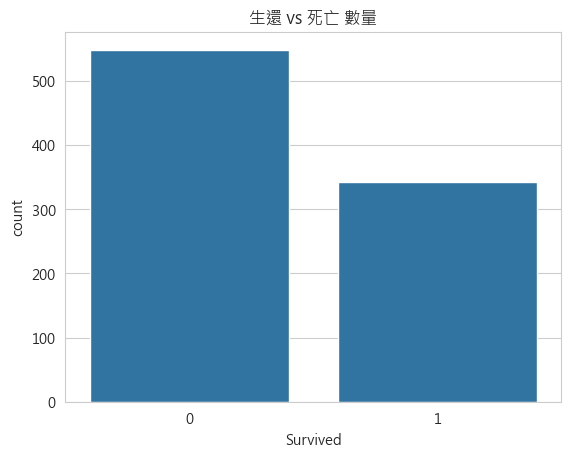

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [3]:
## Day 3：視覺化探索與分組統計  

# 性別人數
sns.countplot(x='Sex', data=df)
plt.title("性別分布")
plt.show()

# 生還人數
sns.countplot(x='Survived', data=df)
plt.title("生還 vs 死亡 數量")
plt.show()

df.groupby('Sex')['Survived'].mean()
df.groupby('Pclass')['Survived'].mean()
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

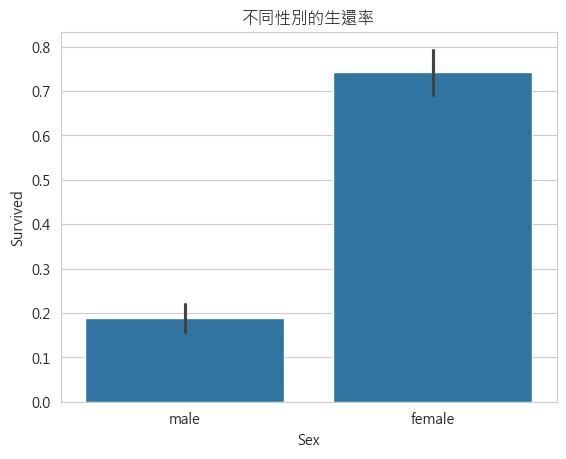

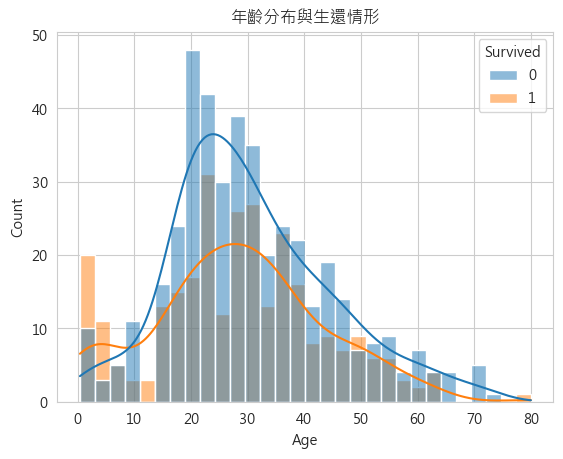

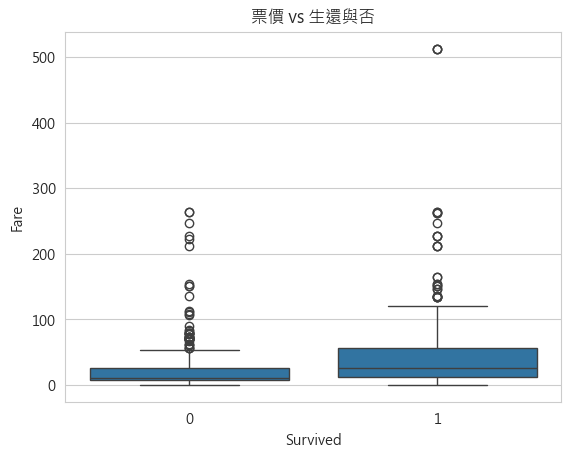

In [4]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("不同性別的生還率")
plt.show()

sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("年齡分布與生還情形")
plt.show()

sns.boxplot(data=df, x='Survived', y='Fare')
plt.title("票價 vs 生還與否")
plt.show()


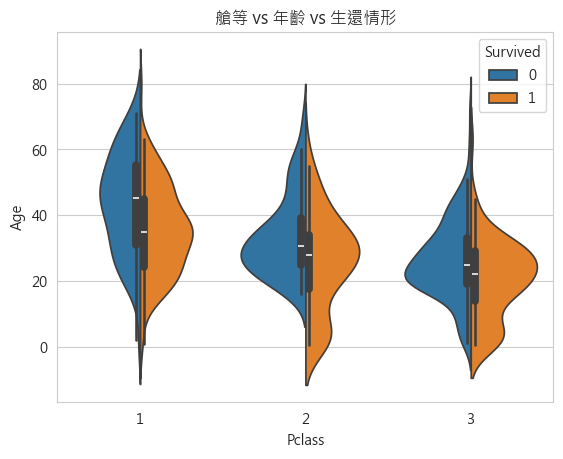

In [5]:
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True)
plt.title("艙等 vs 年齡 vs 生還情形")
plt.show()


In [6]:
## Day 4：資料清洗與特徵工程  

df["Age"]      = df["Age"]     .fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Fare"]     = df["Fare"]    .fillna(df["Fare"].median())

# 建立 HasCabin
df["HasCabin"] = df["Cabin"].notnull().astype(int)

# 然後再刪除 Cabin這個不好的資料
df.drop(columns=["Cabin"], inplace=True)


In [7]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
df["FareBin"] = pd.qcut(df["Fare"], 4, labels=["Low", "Med", "High", "VeryHigh"])
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 60, 100],
                        labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"])

In [8]:
#輸出整理好的資料
df.to_csv("../data/titanic_clean.csv", index=False)
df.to_parquet("../data/titanic_clean.parquet")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,FamilySize,IsAlone,FareBin,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,0,Low,YoungAdult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,0,VeryHigh,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,1,Med,YoungAdult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,0,VeryHigh,YoungAdult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,Med,YoungAdult


欄位清單： ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'HasCabin', 'FamilySize', 'IsAlone', 'FareBin', 'AgeGroup']


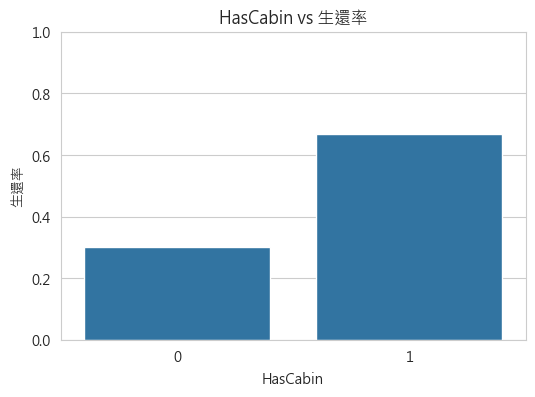

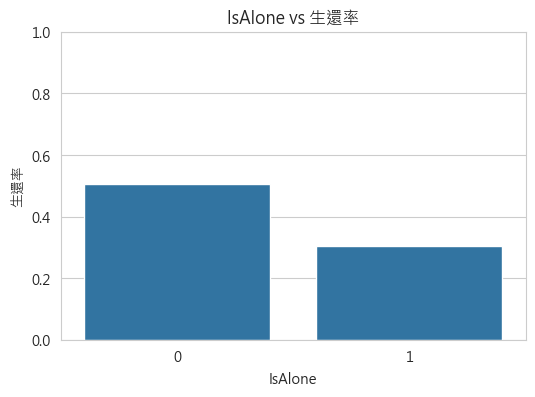

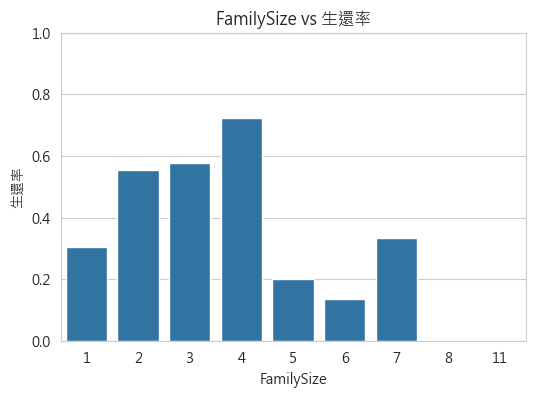

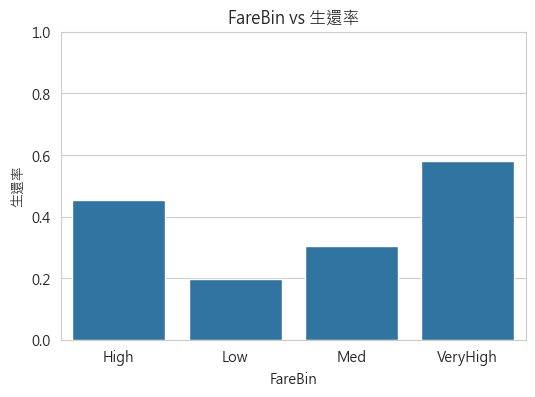

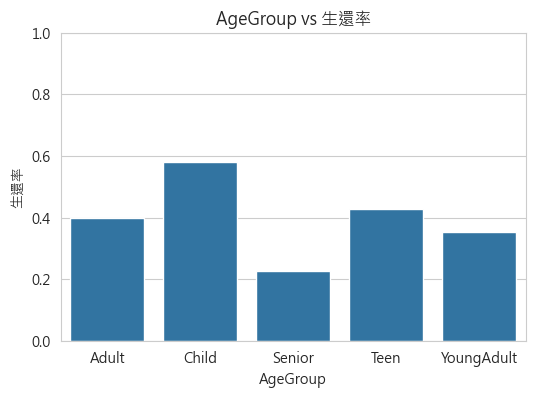

In [9]:
# 1. 輸入清洗後資料
df_clean = pd.read_csv("../data/titanic_clean.csv")

# 2. 快速檢查前幾筆
display(df_clean.head())

# 3. 檢視欄位列表，確認特徵都在
print("欄位清單：", df_clean.columns.tolist())

# 4. 分組統計：新特徵 vs 生還率
features = ["HasCabin", "IsAlone", "FamilySize", "FareBin", "AgeGroup"]
for feat in features:
    grp = df_clean.groupby(feat)["Survived"].mean().reset_index()
    plt.figure(figsize=(6,4))
    sns.barplot(x=feat, y="Survived", data=grp)
    plt.ylim(0,1)
    plt.title(f"{feat} vs 生還率")
    plt.ylabel("生還率")
    plt.xlabel(feat)
    plt.show()

# 結論與後續建議

1. **關鍵發現**  
   - 艙等、性別與票價是最強的生還率預測因子  
   - Age 與 FamilySize 次要影響  
2. **建議做法**  
   - 模型建議採用這些變數做 Logistic Regression / Tree-based 方法  
   - 對 Fare 與 Age 做分箱，對 Embarked 做 one-hot  
3. **後續可優化**  
   - 處理 Cabin 欄位（抽取艙層信息）  
   - 引入更多外部資料（如船公司、票號前綴）  
   - 自動化管線：Notebook → 模組 → CI/CD